In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel(r"D:\SpotifyXEarBuds\data\raw\Spotify_Tracks_Dataset.xlsx")

display(df)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [13]:
# Column names 
df.columns

# Convert Column name into title case 
df.columns=df.columns.str.replace('_', ' ').str.title()
#display(df.head())

In [14]:
# Check duplicate values 
display(df.duplicated().sum()) #No duplicates

# Check and handle missing values:'Name', 'Artists', 'Album Name', 'Track Name'
df.fillna('Unknown', inplace=True)
df.isnull().sum() 

np.int64(0)

Unnamed: 0          0
Track Id            0
Artists             0
Album Name          0
Track Name          0
Popularity          0
Duration Ms         0
Explicit            0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Time Signature      0
Track Genre         0
dtype: int64

In [15]:
# Filter the df for songs with popularity above 90
filtered_df = df[df['Popularity'] > 90]
sorted_df = filtered_df.sort_values(by='Popularity', ascending=False)

# Create a pivot table to demonstrate filtered songs(Pop.>90)
pivot_table = filtered_df.pivot_table(
    index=['Track Name', 'Artists'],  # Row index
    values='Popularity',    # Values to aggregate
    aggfunc=['count', 'mean'] 
)

pivot_table = pivot_table.sort_values(by=('mean', 'Popularity'), ascending=False)
pivot_table = pivot_table.reset_index()
# Display the pivot table

display(pivot_table)

,Track Name,Artists,count,mean
,,,Popularity,Popularity
0,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,2,100.0
1,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,1,99.0
2,I'm Good (Blue),David Guetta;Bebe Rexha,3,98.0
3,La Bachata,Manuel Turizo,4,98.0
4,Me Porto Bonito,Bad Bunny;Chencho Corleone,4,97.0
5,Tití Me Preguntó,Bad Bunny,4,97.0
6,Under The Influence,Chris Brown,2,96.0
7,I Ain't Worried,OneRepublic,3,96.0
8,Efecto,Bad Bunny,4,95.5


Artists
Bad Bunny                     15
The Neighbourhood              4
Manuel Turizo                  4
Bad Bunny;Chencho Corleone     4
Bad Bunny;Bomba Estéreo        4
Bad Bunny;Jhayco               4
Arctic Monkeys                 3
David Guetta;Bebe Rexha        3
OneRepublic                    3
Nicki Minaj                    2
Name: count, dtype: int64

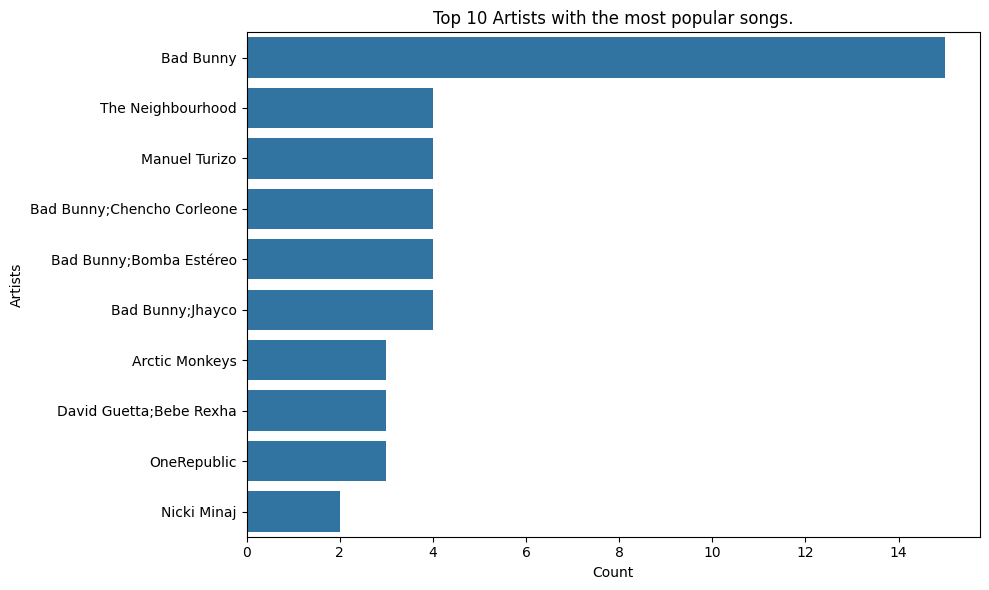

In [16]:
# Top 10 artists most frequent in > 90 popular songs 
filtered_df = df[df['Popularity'] > 90]
artist_counts = filtered_df['Artists'].value_counts()
top_10_artists = artist_counts.head(10)

display(top_10_artists)

# Horizontal bar chart 

import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the Top 10 artists
colors = sns.color_palette('husl', len(top_10_artists))

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_artists.values, y=top_10_artists.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Artists')
plt.title('Top 10 Artists with the most popular songs.')
plt.tight_layout()

plt.savefig('Top 10 Artists with the most popular songs.png', transparent=True)
plt.show()

In [17]:
# Most frequent Genre 
track_genres = filtered_df['Track Genre'].value_counts()
display(track_genres)

Track Genre
pop            12
latin          10
reggae          9
latino          9
reggaeton       9
dance           6
hip-hop         3
rock            3
garage          1
alternative     1
chill           1
alt-rock        1
edm             1
piano           1
indie           1
Name: count, dtype: int64

In [18]:
# Filter the df for songs with popularity above 90
filtered_df = df[df['Popularity'] > 90]

# Select the genre-related columns 
columns_of_genre = [
    'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 
    'Speechiness', 'Acousticness', 'Instrumentalness', 
    'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Track Genre'
]
filtered_songs_selected = filtered_df[columns_of_genre]

# Descriptive statistics 
descriptive_stats = filtered_songs_selected.describe(include='all').round(3)
display(descriptive_stats)

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track Genre
count,68.000,68.000,68.000,68.000,68.000,68.000,68.000,68.000,68.000,68.000,68.000,68.000,68
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pop
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
mean,0.721,0.673,5.147,-5.665,0.382,0.079,0.199,0.003,0.196,0.448,114.935,3.956,NaN
std,0.142,0.141,3.735,1.873,0.490,0.089,0.223,0.007,0.169,0.215,23.645,0.207,NaN
min,0.440,0.317,0.000,-9.345,0.000,0.026,0.000,0.000,0.055,0.131,67.528,3.000,NaN
25%,0.619,0.578,2.000,-6.294,0.000,0.036,0.060,0.000,0.093,0.286,99.968,4.000,NaN
50%,0.733,0.686,5.000,-5.338,0.000,0.045,0.090,0.000,0.114,0.419,114.526,4.000,NaN
75%,0.834,0.756,7.250,-4.898,1.000,0.057,0.294,0.000,0.239,0.558,124.980,4.000,NaN


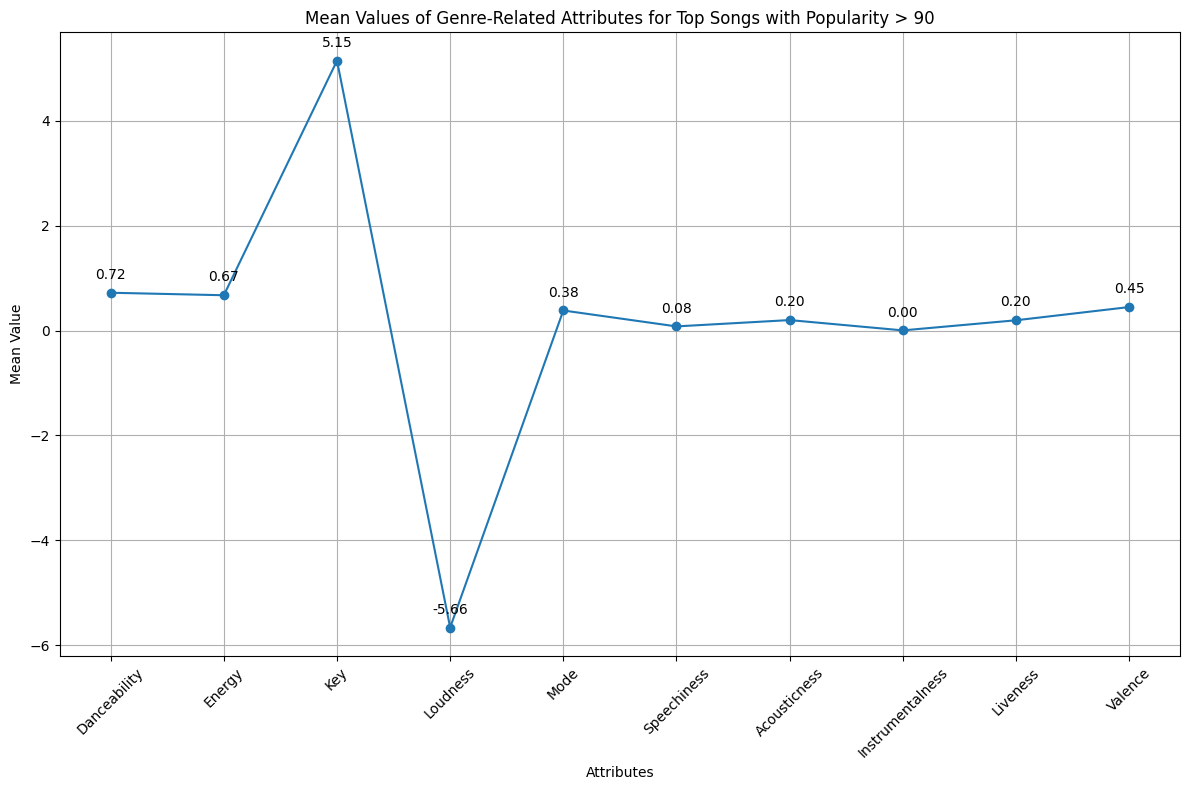

In [19]:
# Line chart for Mean Values of Genre-Related Attributes for Top Songs with Popularity > 90
import matplotlib.pyplot as plt

# Filter the DataFrame for songs with popularity above 90
filtered_df = df[df['Popularity'] > 90]

# Select the specified columns
columns_of_interest = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 
                       'Speechiness', 'Acousticness', 'Instrumentalness', 
                       'Liveness', 'Valence']

# Calculate the mean of the selected columns
mean_values = filtered_df[columns_of_interest].mean()

# Plot line chart for the mean values of the selected columns
plt.figure(figsize=(12, 8))
plt.plot(mean_values.index, mean_values.values, marker='o', linestyle='-')
plt.xlabel('Attributes')
plt.ylabel('Mean Value')
plt.title('Mean Values of Genre-Related Attributes for Top Songs with Popularity > 90')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Add numbers (mean values) to the plot
for i, value in enumerate(mean_values):
    plt.annotate(f'{value:.2f}', (mean_values.index[i], value), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.savefig('mean_values_line_chart_with_numbers.png', transparent=True)
plt.show()

In [21]:
# Save the cleaned dataset to a new CSV file
df.to_csv("cleaned_spotify_data.csv", index=False)

print("cleaned_spotify_data saved to cleaned_data.csv")

cleaned_spotify_data saved to cleaned_data.csv
